# Autoencoder with Convolution Network
- https://blog.keras.io/building-autoencoders-in-keras.html

## Import Packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import keras
from keras import backend
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Conv2D, Dropout, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

/Users/skim0119/venv/GenP3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/skim0119/venv/GenP3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Prepare Data

- Label is not imported, because autoencoder is unsupervised learning method
- MNIST contain 60,000 training dataset and 10,000 test dataset.

In [14]:
(X_train, _), (X_test, _) = mnist.load_data() # label is not imported
img_rows, img_cols = X_train.shape[1:]

if backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('MNIST Dataset Imported')
print(X_train.shape, X_test.shape)

MNIST Dataset Imported
(60000, 28, 28, 1) (10000, 28, 28, 1)


## Model

In [10]:
# Define Layers
in_layer = Input(shape=input_shape)
# encoding part
en_conv1 = Conv2D(4, (3,3), padding='same', activation='relu')(in_layer)
p1_layer = MaxPooling2D((2,2), padding='same')(en_conv1)
en_conv2 = Conv2D(8, (3,3), padding='same', activation='relu')(p1_layer)
p2_layer = MaxPooling2D((2,2), padding='same')(en_conv2)
en_conv3 = Conv2D(1, (7,7), padding='same', activation='relu')(p2_layer)
# decoding part
de_conv1 = Conv2D(16,(3,3), padding='same', activation='relu')(en_conv3)
u1_layer = UpSampling2D((2,2))(de_conv1)
de_conv2 = Conv2D(8,(3,3), padding='same', activation='relu')(u1_layer)
u2_layer = UpSampling2D((2,2))(de_conv2)
de_conv3 = Conv2D(4,(3,3), padding='same', activation='relu')(u2_layer)
out_layer = Conv2D(1, (3,3), padding='same', activation='sigmoid')(de_conv3)

# Define model
model = Model(in_layer, out_layer)
model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training

In [4]:
nepoch = 10
batch_size=128
history = model.fit(X_train, X_train,
                          epochs=nepoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 85s 2ms/step - loss: 0.2093 - acc: 0.7965 - val_loss: 0.1617 - val_acc: 0.7929
Epoch 2/10
48000/48000 [==============================] - 89s 2ms/step - loss: 0.1366 - acc: 0.8050 - val_loss: 0.1319 - val_acc: 0.8030
Epoch 3/10
48000/48000 [==============================] - 79s 2ms/step - loss: 0.1211 - acc: 0.8086 - val_loss: 0.1185 - val_acc: 0.8132
Epoch 4/10
48000/48000 [==============================] - 80s 2ms/step - loss: 0.1131 - acc: 0.8101 - val_loss: 0.1100 - val_acc: 0.8134
Epoch 5/10
48000/48000 [==============================] - 78s 2ms/step - loss: 0.1085 - acc: 0.8108 - val_loss: 0.1044 - val_acc: 0.8112
Epoch 6/10
48000/48000 [==============================] - 84s 2ms/step - loss: 0.1055 - acc: 0.8113 - val_loss: 0.1032 - val_acc: 0.8112
Epoch 7/10
48000/48000 [==============================] - 77s 2ms/step - loss: 0.1036 - acc: 0.8115 - val_loss: 0.0999 - val_acc

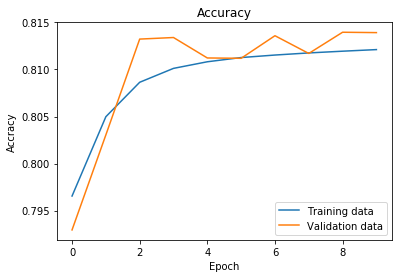

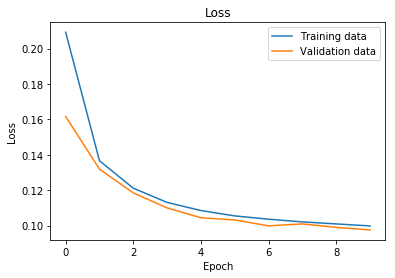

In [11]:
if not isinstance(history, dict):
    history = history.history
    
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc=0)
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc=0)
plt.show()

## Result and Analysis

(10000, 28, 28, 1) (10000, 28, 28, 1)


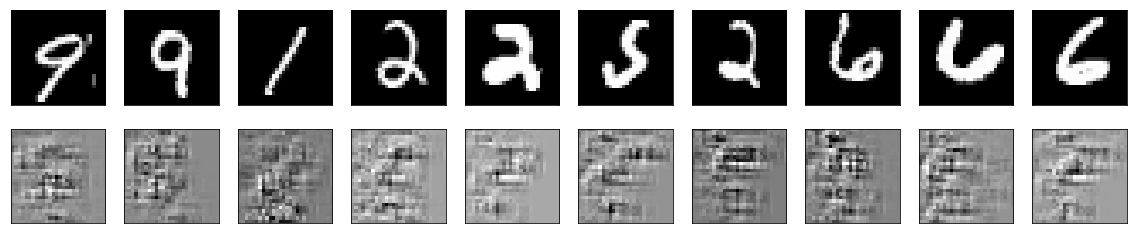

In [19]:
dec_imgs = model.predict(X_test)
print(dec_imgs.shape, X_test.shape)

if backend.image_data_format() == 'channels_first':
    N, n_ch, n_i, n_j = X_test.shape
else:
    N, n_i, n_j, n_ch = X_test.shape

X_testpresent = X_test.reshape(N, n_i, n_j)
dec_imgs = dec_imgs.reshape(dec_imgs.shape[0], n_i, n_j)

n = np.random.choice(np.arange(10000),10)
plt.figure(figsize=(20, 4))
for i, test_id in enumerate(n):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_testpresent[test_id], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(dec_imgs[test_id], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()